<a href="https://colab.research.google.com/github/anaguilarar/Pillars_PNuT/blob/main/root_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

To speed up the detection process, please use gpu, habilitate the option in:
- Runtime -> change runtime type -> hardware accelerator -> gpu

In [1]:
import os
from google.colab import files
from IPython.display import Image
from PIL import Image as Img
import numpy as np
import io

if not os.path.exists("/content/Pillars_PNuT") and not os.getcwd().endswith("/content/Pillars_PNuT"):
    !git clone https://github.com/anaguilarar/Pillars_PNuT.git
    print("Cloned")

else:
    print("Pillars_PNuT directory already exists")

if not os.getcwd().endswith("/content/Pillars_PNuT"):
  os.chdir("/content/Pillars_PNuT")

### folder that will contain the imagery
imagery_path = "/content/"


Pillars_PNuT directory already exists


### Images uploading

To use this algorithm is necessary first to upload the pillar images.
- one option is to drag all your images to the left panel that appears after clicking on the folder symbol.
- or you can use the following cell to upload your images from your local storage.


In [ ]:

images = files.upload()

for i in range(len(images)):
  m = Image(list(images.keys())[i])
  image = Img.open(io.BytesIO(m.data)).save(os.path.join(imagery_path,list(images.keys())[i]))


Saving col-0-line36--p7_jpg.rf.86c17994647c7b9a2934c719c3296910.jpg to col-0-line36--p7_jpg.rf.86c17994647c7b9a2934c719c3296910.jpg
Saving line9-p1_jpg.rf.d7b92679d597945478462dacf94d35c0.jpg to line9-p1_jpg.rf.d7b92679d597945478462dacf94d35c0.jpg
Saving line34-p3_jpg.rf.c1aa749f30f85ddb281f4e7de2ee6543.jpg to line34-p3_jpg.rf.c1aa749f30f85ddb281f4e7de2ee6543.jpg
Saving line35-p1_jpg.rf.4f74da55ea342344539026852c6a3c06.jpg to line35-p1_jpg.rf.4f74da55ea342344539026852c6a3c06.jpg
Saving line37-p1_jpg.rf.96982f02676cbfe891d34c3c8bd6b857.jpg to line37-p1_jpg.rf.96982f02676cbfe891d34c3c8bd6b857.jpg
Saving line42-p4_jpg.rf.75c37f3dfc8568483ebd6eb236eb6a9e.jpg to line42-p4_jpg.rf.75c37f3dfc8568483ebd6eb236eb6a9e.jpg


### Model setting

Once the imagery was uploaded, the next step is to set the root and pillar detector. In order to do that we will use a function named as RootandPillars, this function will first find the root using a segmentation model based on convolutional neural networks. Then the pillars are detected as circles using the [Hough transform](https://docs.opencv.org/4.x/da/d53/tutorial_py_houghcircles.html).

In [2]:
from root_distance.rootdetector_fun import RootandPillars

wp  = "https://dlmodels-bucket.s3.ap-northeast-1.amazonaws.com/root_detection.zip"
rootdetector = RootandPillars(imagery_path, ## folder that contain images
                              wp, ## CNN model's weight
                              max_pillars_around_root = 16, ## number of pillars that are around the root
                              imgsuffix = '.jpg', ## images extension
                              scale_factor= 0.4023 ## pixel size
                              )


checkpoint load models/root_detection/vgg16_root_detection
1/1 [==============================] - 9s 9s/step
17 pillars were found
16 pillars were found
16 pillars were found
16 pillars were found
16 pillars were found
16 pillars were found
17 pillars were found


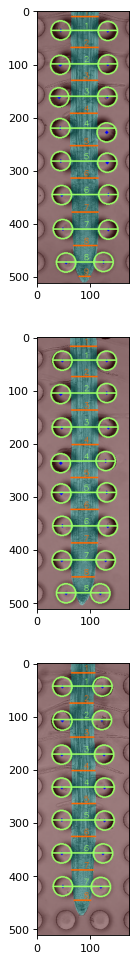

In [3]:
f = rootdetector.plot_final_layer(pillars_color=(153, 255, 102), ## RGB color
                                  maximages = 3, ## number of images to plot
                                  figsize = (8,15))

### Exporting images and tables

In [5]:
rootdetector.lines_table_as_csv("test.csv")
rootdetector.export_final_images('/content/overlaped_images/',
                                 pillars_color=(153, 255, 102),
                                 root_lines_color =(0,0,0))


In [ ]:
rootdetector.root_lines_as_table

,index,line_index,distances_pixels,distances_microns,corrected_factor,object,image_name
0,0,1,50.0,124.285359,-67.857320,root,col-0-line36--p5_jpg.rf.de4f5850670f0e2473b162...
1,1,2,50.0,124.285359,-67.857320,root,col-0-line36--p5_jpg.rf.de4f5850670f0e2473b162...
2,2,3,49.0,121.799652,-69.100174,root,col-0-line36--p5_jpg.rf.de4f5850670f0e2473b162...
3,3,4,49.0,121.799652,-69.100174,root,col-0-line36--p5_jpg.rf.de4f5850670f0e2473b162...
4,4,5,50.0,124.285359,-67.857320,root,col-0-line36--p5_jpg.rf.de4f5850670f0e2473b162...
5,5,6,48.0,119.313945,-70.343028,root,col-0-line36--p5_jpg.rf.de4f5850670f0e2473b162...
6,6,7,46.0,114.342530,-72.828735,root,col-0-line36--p5_jpg.rf.de4f5850670f0e2473b162...
7,7,8,39.0,96.942580,-81.528710,root,col-0-line36--p5_jpg.rf.de4f5850670f0e2473b162...
8,0,1,52.0,129.256774,-65.371613,root,col-0-line36--p7_jpg.rf.86c17994647c7b9a2934c7...
9,1,2,50.0,124.285359,-67.857320,root,col-0-line36--p7_jpg.rf.86c17994647c7b9a2934c7...
